

# Feature Engineering


---

## Review of Linear Regression
---

- Linear regression is a way for us to relate some dependent variable $Y$ to independent variables $X_1$,$\ldots$,$X_p$.
- We might write this out in one of the following two forms:
$$
\begin{eqnarray}
Y &=& \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p +\varepsilon\\
\mathbf{Y} &=& \mathbf{X \beta + \varepsilon}
\end{eqnarray}
$$

<details><summary>
There are four assumptions to the simple linear regression model and five assumptions to the multiple linear regression model.
</summary>
1. **Linearity:** $Y$ is linearly related to $X_i$ for all $i$.<br>
2. **Independence:** Each residual $\varepsilon_i$ is independent of $\varepsilon_j$ for all $i\neq j$.<br>
3. **Normality:** The errors (residuals) follow a Normal distribution with mean 0.<br>
4. **Equality of Variance:** The errors (residuals) should have a roughly consistent pattern, regardless of the value of $X_i$. (There should be no discernible relationship between $X_i$ and the residuals.)<br>
5. **Independence Part II:** $X_i$ is independent of $X_j$ for all $i\neq j$.
</details>

We can measure the performance of our model by using mean squared error (MSE).

## Feature Engineering
---

- If I use degrees Fahrenheit to predict how much a substance will expand or inches of rain to predict traffic accidents, people outside the United States may have a tougher time understanding my work.
- If I use straight line distance (as the crow flies) between two locations, my estimated time of arrival in a taxi or a Lyft is going to be pretty bad.
- If I put text into my model without some sort of preprocessing, my computer isn't going to understand how to handle it.

Suffice it to say: If your features (variables) aren't good, your predictions and inferences won't be good!

#### What is feature engineering?

"Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." - Andrew Ng

**Feature engineering** is the term broadly applied to the creation and manipulation of features (variables) used in machine learning algorithms.

Unless we're working with the same data over and over again, this isn't something we can automate. It will require creativity and a good, thorough understanding of our data.

#### The Process of Data Science
1. Data Gathering
2. Data Cleaning/Munging
3. EDA
4. Modeling
5. Reporting

Feature engineering will straddle all five of these steps, but mostly focus on steps 2 and 3.

#### [The Process of Feature Engineering](https://www.youtube.com/watch?v=drUToKxEAUA)
1. Brainstorming or testing features.
2. Deciding what features to create.
3. Creating features.
4. Checking how the features work with your model.
5. Improving features (if needed).
6. Return to step 1.
7. "Do data science!"

## Importing Libraries
---

We'll need the following libraries for today's lesson:

1. `pandas`
2. `numpy`
3. `seaborn`
4. `train_test_split` and `cross_val_score` from `sklearn`'s `model_selection` module
5. a `LinearRegression` mode from `sklearn`'s `linear_model` module
6. `StandardScaler` and `PolynomialFeatures` from `sklearn`'s `preprocessing` module

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score 

from sklearn.preprocessing import StandardScaler, PolynomialFeatures # Which is new 

## Load the Data

---

Today's dataset (`Advertising.csv`) is from the [ISLR website](https://statlearning.com/). 

Drop `Unnamed: 0` once you've loaded the csv into a `DataFrame`.

In [ ]:
df = pd.read_csv('https://www.statlearning.com/s/Advertising.csv')

In [ ]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.drop(columns="Unnamed: 0",inplace=True)

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Create our features matrix (`X`) and target vector (`y`)
---

The following columns will be our features:
- `TV`
- `radio`
- `newspaper`

The `sales` column is our target; the column we're trying to predict.

In the cell below, create your `X` and `y` variables.

In [ ]:
features=['TV','radio','newspaper']
X=df[features]
y=df['sales']

In [ ]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

## Linear Regression model
---

In the cell below, create a `LinearRegression` model.

In [ ]:
lr = LinearRegression()

## Baseline score
---

In the cell below, use `cross_val_score` to get a baseline $R^2$ for our model.

In [ ]:
cross_val_score(lr,X,y,cv=5).mean()

0.8871063495438435

## Interaction terms
---

Imagine seeing a commercial on TV, and then hearing a commercial by the same company a few days later. If you eventually purchase the product in question, was it the TV spot that swayed you or the radio commercial...or was a it a synergy of the two commercials that did the trick?

Interaction terms allow us to see what affect the **combination** of two features have on our label. For example, I'm not a fan of plain hot dogs, and I never eat mustard by itself. But I do enjoy hot dogs **with** mustard.

To create an interaction term, we simply do a pairwise multiplication of two columns:
```python
df['Interaction Col'] = df['Column 1'] * df['Column 2']
```

In the cell below, create an interaction column between `TV` and `radio`.

In [ ]:
df['TV * radio']= df['TV']*df['radio']

In [ ]:
df.head()


,TV,radio,newspaper,sales,TV * radio
0,230.1,37.8,69.2,22.1,8697.78
1,44.5,39.3,45.1,10.4,1748.85
2,17.2,45.9,69.3,9.3,789.48
3,151.5,41.3,58.5,18.5,6256.95
4,180.8,10.8,58.4,12.9,1952.64


## EDA: Create a heatmap
---

In the cell below, create a heatmap in `seaborn` to show how our `TV * radio` interaction term correlates to all the other columns.

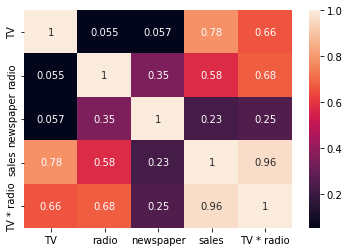

In [ ]:
sns.heatmap(df.corr(),annot=True)

## EDA: Pairplot
---

Now use `seaborn`'s `.pairplot()` method to create scatterplots with our new column.

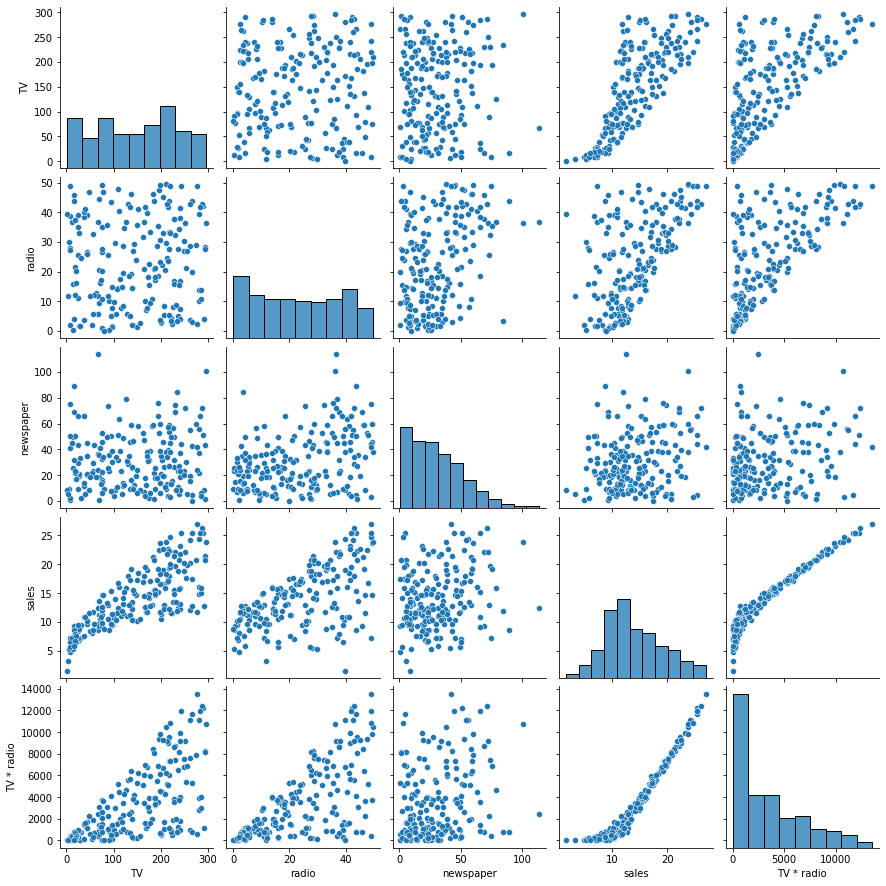

In [ ]:
sns.pairplot(df)

## Create our features matrix (`X`) and target vector (`y`)
---

Our new column is highly correlated to our label, so let's incorporate it in our features matrix:
- `TV`
- `radio`
- `newspaper`
- `TV * radio` interaction term

The `sales` column is our label: the column we're trying to predict.

In the cell below, create your `X` and `y` variables.

In [ ]:
features.append('TV * radio')

In [ ]:
features

['TV', 'radio', 'newspaper', 'TV * radio']

In [ ]:
X = df[features]

## Model evaluation
---

Use `cross_val_score` to see how much our new feature moves the $R^2$ score.

In [ ]:
scores=cross_val_score(lr,X,y,cv=5)

# Step 1 dividing the data
# Step 2 creating the folds
# Step 3 fiting the model based on the folds
# Step 4 checking scores of the test data 

In [ ]:
scores.mean()

0.9641704265806474

## `PolynomialFeatures`
---

Congrats! We struck gold on our first interaction term. The question now is how do we create interaction terms **en masse**? In our small dataset, we have three interaction terms:

1. `TV * radio`
2. `TV * newspaper`
3. `radio * newspaper`

With larger datasets, manually creating interaction terms would quickly become untenable. That's where `sklearn`'s `PolynomialFeatures` comes in. `PolynomialFeatures` will return 9 columns from our original features matrix:

1. The original `TV` column
2. The original `radio` column
3. The original `newspaper` column
4. `TV^2` (`TV` squared)
5. `radio^2` (`radio` squared)
6. `newspaper^2` (`newspaper` squared)
7. `TV radio` interaction
8. `TV newspaper` interaction
9. `radio newspaper` interaction

In the cells provided, use `PolynomialFeatures` to transform `X`. **NOTE**: You'll need to set `include_bias=False`.

In [ ]:
features=['TV','radio','newspaper']

In [ ]:
X=df[features]

In [ ]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [ ]:
cross_val_score(lr,X,y,cv=5).mean()

0.8871063495438435

In [ ]:
poly=PolynomialFeatures(include_bias=False)

In [ ]:
X_poly=poly.fit_transform(X)

In [ ]:
X_poly

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [ ]:
X_poly.shape

(200, 9)

In [ ]:
pd.DataFrame(X_poly,columns=poly.get_feature_names(features))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56
...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,1459.24,141.34,527.16,13.69,51.06,190.44
196,94.2,4.9,8.1,8873.64,461.58,763.02,24.01,39.69,65.61
197,177.0,9.3,6.4,31329.00,1646.10,1132.80,86.49,59.52,40.96
198,283.6,42.0,66.2,80428.96,11911.20,18774.32,1764.00,2780.40,4382.44


## Model evaluation
---

Use `cross_val_score` to see how much `PolynomialFeatures` affects the $R^2$ score.

In [ ]:
X_poly.shape

(200, 9)

In [ ]:
cross_val_score(lr,X_poly,y).mean()

#Step 1 divide the data set in 5 ,X1_Fold(66,9)Y1(66,) (66,9) (67,9)
#Step 2
#Step 3
#Step 4

0.9842540981580093

## Scaling
---

Throughout this course, we'll encounter several models that require you to scale your data prior to modeling. Imagine you were trying predict the price of a house, and you had two features: square footage and number of bedrooms. These two features are on different scales, separated by a few orders of magnitude (square footage is in the thousands and number of bedrooms is in the single digits). 

When we scale our data, we essentially convert our columns into Z-scores. 

### ${x- \mu \over \sigma}$

In the cell provided, scale the `TV` column.

In [ ]:
(df['TV']-df['TV'].mean())/df['TV'].std()

0      0.967425
1     -1.194379
2     -1.512360
3      0.051919
4      0.393196
         ...   
195   -1.267759
196   -0.615491
197    0.348934
198    1.590574
199    0.990720
Name: TV, Length: 200, dtype: float64

In [ ]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


## `StandardScaler`
---

Rather than doing this manually for each column, `sklearn` has a `StandardScaler` class that allows us to scale our entire dataset in a few lines of code.

In [ ]:
ss=StandardScaler()

In [ ]:
ss.fit(X)

StandardScaler()

In [ ]:
X_scaled=ss.transform(X)

In [ ]:
X_scaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [ ]:
X_scaled_2=ss.fit_transform(X)

In [ ]:
X_scaled_2

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [ ]:
lr.fit(X_scaled,y)

LinearRegression()

In [ ]:
print(lr.intercept_)
print(lr.coef_)

14.0225
[ 3.91925365  2.79206274 -0.02253861]


In [ ]:
lr.score(X_scaled,y)

0.8972106381789521

In [ ]:
cross_val_score(lr,X_scaled,y,cv=5).mean()

0.8871063495438435

## Dummies
---

When we dummy a column, we're converting a categorical column into a one-hot encoded matrix. `pandas` allows us to do this with the `pd.get_dummies()` method.

In [ ]:
fires = pd.read_csv('/content/forestfires.csv')

In [ ]:
fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
fires[['day']]

,day
0,fri
1,tue
2,sat
3,fri
4,sun
...,...
512,sun
513,sun
514,sun
515,sat


In [ ]:
pd.get_dummies(fires[['day']])

,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
512,0,0,0,1,0,0,0
513,0,0,0,1,0,0,0
514,0,0,0,1,0,0,0
515,0,0,1,0,0,0,0


In [ ]:
pd.get_dummies(fires, columns = ['month','day'], drop_first=True)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,1,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,1,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,1,0,0,0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,1,0,0,0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,1,0,0,0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0
